### Replicate random assignations of labels to sequences and plot metrics distribution

In [12]:
import os
import numpy as np

# home_dir = os.environ['HOME']
# challenge_path = home_dir + os.sep + "tmp" +os.sep + "Msiam" + os.sep
# challenge_path += "DataChallenge" + os.sep + "2017-2018" + os.sep + "ScriptsJB"

# os.chdir(challenge_path)

from random_assignation import *

import sys
sys.path += ["." + os.sep + "../metric"]

from compute_metric import *

#### Choose test sequence

In [13]:
scenario = "Scenario03-05"

In [14]:
input_dir = "C:\\Users\\sebbe\\OneDrive\\Dokument\\GitHub\\dataChallenge\\" + scenario

read_nb_speakers=True

#### Parse detections.txt

In [15]:
nb_speakers_from_file, nb_persons_frame, contents, frame_id, \
           nb_persons_changes = parse_detections(input_dir, read_nb_speakers)

#### Try several examples of random label generation

###### Generate random labels and speech utterance

In [16]:
independent_simulation(input_dir, nb_persons_frame, contents, frame_id, 
                       speech_prob=0.5)

print_metrics(input_dir + os.sep + "groundTruth.txt", input_dir + os.sep + "independent_random_predictions.txt")

NameError: name 'print_metrics' is not defined

In [6]:
dependent_simulation(input_dir, nb_persons_frame, contents, frame_id, 
                     nb_persons_changes, speech_change_prob=0.5)

print_metrics(input_dir + os.sep + "groundTruth.txt", input_dir + os.sep + "dependent_random_predictions.txt")

reading GT file
reading result file
MOTA
0.921618418825
MOTP
0.00902244079875
SA
0.580634162973
MOTSA
0.505163365499


###### Random permutation of labels

In [7]:
# Parse GroundTruth.txt
nb_speakers_from_file, nb_persons_frame, contents, frame_id, \
           nb_persons_changes = parse_detections(input_dir, True, False)

permute_ground_truth(input_dir, contents)
print_metrics(input_dir + os.sep + "groundTruth.txt", input_dir + os.sep + "permuted_groundTruth.txt")

reading GT file
reading result file
MOTA
1.0
MOTP
0.0
SA
1.0
MOTSA
1.0


### Monte-Carlo evaluation of independent_simulation

In [8]:
nb_sim = 1000

In [9]:
li_MOTSA = [-1.] * nb_sim
li_MOTA = [-1.] * nb_sim

for i in range(nb_sim):
    nb_speakers_from_file, nb_persons_frame, contents, frame_id, \
           nb_persons_changes = parse_detections(input_dir, read_nb_speakers)
    independent_simulation(input_dir, nb_persons_frame, contents, frame_id, 
                       speech_prob=0.5)
    li_MOTA[i], MOTP, SA, li_MOTSA[i] = compute_metrics(input_dir + os.sep + "groundTruth.txt", input_dir + os.sep + "independent_random_predictions.txt")
    if (i+1) % 100 == 1:
        print("Finished replicate " + str(i+1))

Finished replicate 1
Finished replicate 101
Finished replicate 201
Finished replicate 301
Finished replicate 401
Finished replicate 501
Finished replicate 601
Finished replicate 701
Finished replicate 801
Finished replicate 901


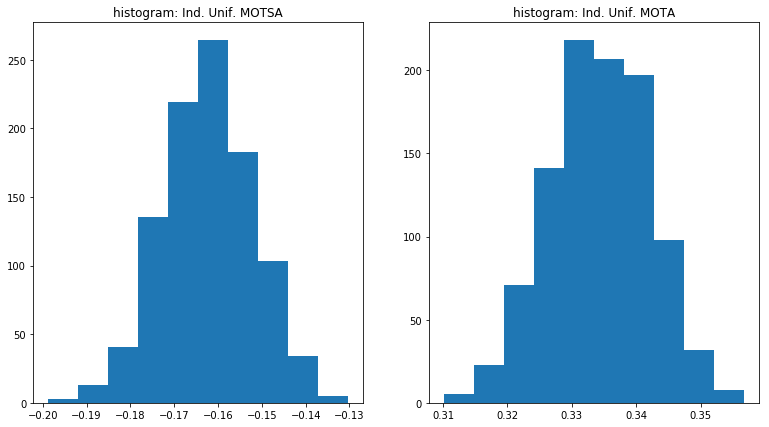

In [12]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
# import scipy
fig = figure(figsize=(13, 7))
fig.add_subplot(1,2,1)

plt.hist(li_MOTSA)
plt.title("histogram: Ind. Unif. MOTSA")

fig.add_subplot(1,2,2)
plt.hist(li_MOTA)
plt.title("histogram: Ind. Unif. MOTA")

plt.show()

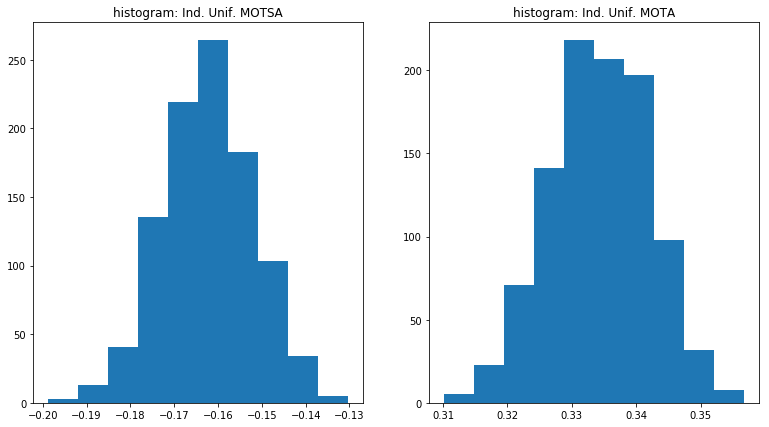

In [13]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
# import scipy
fig = figure(figsize=(13, 7))
fig.add_subplot(1,2,1)

plt.hist(li_MOTSA)
plt.title("histogram: Ind. Unif. MOTSA")

fig.add_subplot(1,2,2)
plt.hist(li_MOTA)
plt.title("histogram: Ind. Unif. MOTA")

plt.show()

### Monte-Carlo evaluation of dependent_simulation

In [14]:
ld_MOTSA = [-1.] * nb_sim
ld_MOTA = [-1.] * nb_sim

for i in range(nb_sim):
    nb_speakers_from_file, nb_persons_frame, contents, frame_id, \
           nb_persons_changes = parse_detections(input_dir, read_nb_speakers)
    dependent_simulation(input_dir, nb_persons_frame, contents, frame_id, 
                         nb_persons_changes, speech_change_prob=0.5)
    ld_MOTA[i], MOTP, SA, ld_MOTSA[i] = compute_metrics(input_dir + os.sep + "groundTruth.txt", input_dir + os.sep + "dependent_random_predictions.txt")
    if (i+1) % 100 == 1:
        print("Finished replicate " + str(i+1))

Finished replicate 1
Finished replicate 101
Finished replicate 201
Finished replicate 301
Finished replicate 401
Finished replicate 501
Finished replicate 601
Finished replicate 701
Finished replicate 801
Finished replicate 901


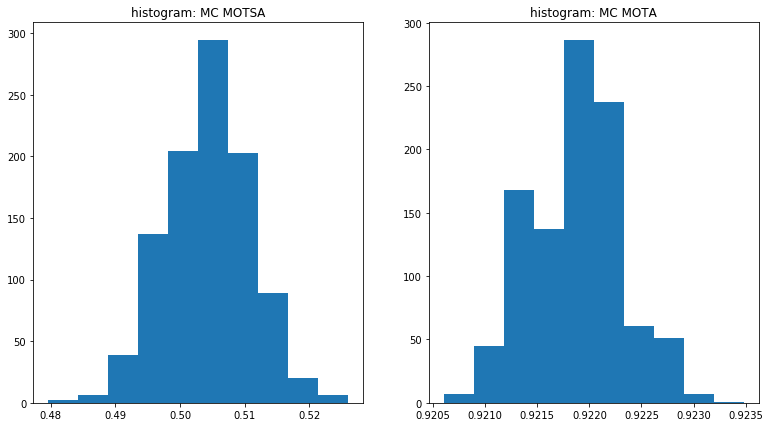

In [15]:
fig = figure(figsize=(13, 7))
fig.add_subplot(1,2,1)

plt.hist(ld_MOTSA)
plt.title("histogram: MC MOTSA")

fig.add_subplot(1,2,2)
plt.hist(ld_MOTA)
plt.title("histogram: MC MOTA")

plt.show()

In [16]:
set(ld_MOTA)

{0.92060267479261892,
 0.92077196546470286,
 0.9209412561367869,
 0.92111054680887083,
 0.92127983748095477,
 0.92144912815303881,
 0.92161841882512274,
 0.92178770949720668,
 0.92195700016929072,
 0.92212629084137465,
 0.92229558151345858,
 0.92246487218554263,
 0.92263416285762656,
 0.92280345352971049,
 0.92297274420179454,
 0.92314203487387847,
 0.92348061621804645}